In [1]:
import tensorflow as tf
import numpy as np
from skimage import io
from main import build_model
import matplotlib.pyplot as plt
%matplotlib inline

inp = tf.placeholder(tf.float32,shape=[None,224,224,4],name='input')
net = build_model(inp,"vgg16")

# Attach sigmoid and reshape
out= tf.reshape(tf.sigmoid(net),[-1,56,56,1])


saver = tf.train.Saver()
sess = tf.InteractiveSession()
saver.restore(sess, 'exp/test2/epoch-77')

print("Model Loaded")

Model Loaded


In [3]:
from dataprovider.preprocess import vgg_preprocess
import os
from skimage import transform
BASE_DIR = os.path.join('/work/george','DAVIS')
IMAGESETS = os.path.join('ImageSets','480p')
    
RESIZE_HEIGHT = 224
RESIZE_WIDTH = 224

def read_image(imageFile,prevMaskFile):
        
    # Fix full file path
    rgbFile =BASE_DIR + imageFile
    maskFile = BASE_DIR + prevMaskFile
        
    # Read images 
    rgb = io.imread(rgbFile)
    mask = io.imread(maskFile,as_grey=True)
    mask = np.expand_dims(mask,axis=2)
        
    # Concatenate images
    image =  np.concatenate((rgb, mask), 2)
    
    # Resize 
    image = transform.resize(image,[RESIZE_HEIGHT,RESIZE_WIDTH])
       
    #io.imshow(image[:,:,0:3])  
    print('Max',image.max(),image.min())
    image = image*255
    #plt.imshow(image[:,:,0:3].astype(np.uint8)) 
    
    
    image = np.expand_dims(image,axis=0)
    
    image = vgg_preprocess(image)
    
    return image
test_img = ['/JPEGImages/480p/bear/00004.jpg' ,'/Annotations/480p/bear/00003.png']
v = read_image(test_img[0],test_img[1])

2016-09-29 19:31:06,928 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2016-09-29 19:31:06,929 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 2880
Max 1.0 0.0


2016-09-29 14:05:43,958 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2016-09-29 14:05:43,960 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 2880
Max 1.0 0.0
2016-09-29 14:05:45,308 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2016-09-29 14:05:45,309 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 3551
Max 1.0 0.0
2016-09-29 14:05:45,725 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2016-09-29 14:05:45,726 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 3129
Max 1.0 0.0
2016-09-29 14:05:46,035 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2016-09-29 14:05:46,036 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 3956
Max 1.0 0.0
2016-09-29 14:05:46,338 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2016-09-29 14:05:46,339 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 3068
Max 1.0 0.0


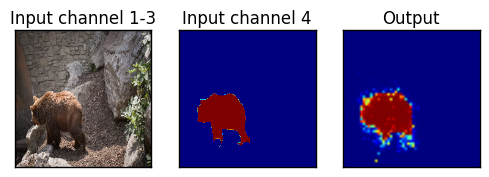

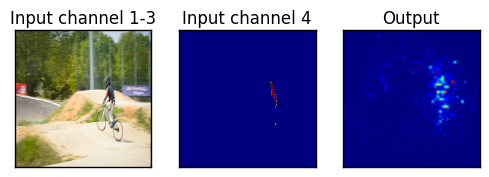

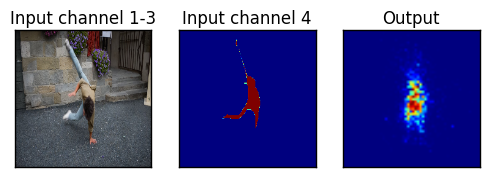

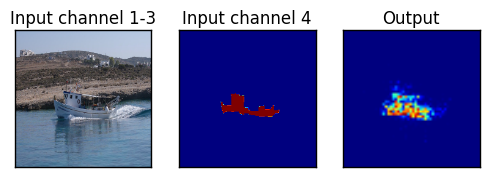

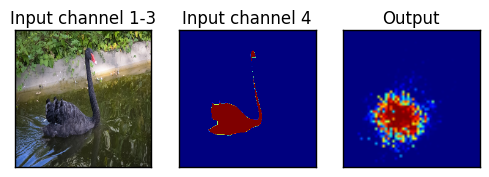

In [4]:
from skimage import morphology

img_list = [['/JPEGImages/480p/bear/00004.jpg' ,'/Annotations/480p/bear/00003.png'],
['/JPEGImages/480p/bmx-bumps/00086.jpg' ,'/Annotations/480p/bmx-bumps/00085.png'],
           ['/JPEGImages/480p/breakdance-flare/00003.jpg', '/Annotations/480p/breakdance-flare/00002.png'],
           ['/JPEGImages/480p/boat/00008.jpg','/Annotations/480p/boat/00007.png' ],
           ['/JPEGImages/480p/blackswan/00007.jpg', '/Annotations/480p/blackswan/00006.png' ]]

_R_MEAN = 123.68
_G_MEAN = 116.78
_B_MEAN = 103.94
_M_MEAN = 127

for image_no in range(len(img_list)):

    image = read_image(img_list[image_no][0],img_list[image_no][1])
    image[0,:,:,3] = morphology.erosion(image[0,:,:,3],np.ones([7,7]))

    result = sess.run([out],feed_dict={inp:image})

    plt.figure()


    #Plot input image
    plt.subplot(1,3,1)
    frame1 = plt.gca()
    frame1.axes.set_title('Input channel 1-3')
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    rgb = image[0,:,:,0:3]
    #print(rgb.shape)
    means = [_R_MEAN, _G_MEAN ,_B_MEAN]
    rgb = rgb + means
    plt.imshow(rgb.astype(np.uint8))

    #Plot previous label
    plt.subplot(1,3,2)
    
    frame1 = plt.gca()
    frame1.axes.set_title('Input channel 4')
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    plt.imshow(image[0,:,:,3])

    #Plot output
    plt.subplot(1,3,3)
    frame1 = plt.gca()
    frame1.axes.set_title('Output')
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    plt.imshow(result[0][0,:,:,0])

In [ ]:
img[0][0]
